In [1]:
import os, sys
sys.path.insert(0, os.environ['PROJECT_PATH'])

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap, Polygon

sns.set()
%matplotlib inline

In [3]:
from config.resources import path_to

In [4]:
path_to_data = path_to['filtered_data'].format('series_a', 'angel_group')
filtered_investments_df = pd.read_csv(path_to_data, encoding='latin1')

In [5]:
filtered_investments_df.columns

Index([u'funding_round_uuid', u'investor_uuid', u'is_lead_investor',
       u'investor_name', u'country_code_investors', u'state_code_investors',
       u'city_investors', u'investor_type', u'company_uuid',
       u'country_code_investees', u'state_code_investees', u'city_investees',
       u'investment_type', u'raised_amount_usd', u'latitude_investors',
       u'longitude_investors', u'confidence_investors', u'msa_name_investors',
       u'msa_code_investors', u'latitude_investees', u'longitude_investees',
       u'confidence_investees', u'msa_name_investees', u'msa_code_investees'],
      dtype='object')

In [6]:
outgoing_investments_fields = ['investor_uuid', 'city_investors', 'state_code_investors', 'latitude_investors', 'longitude_investors', 'msa_name_investors', 'msa_code_investors']
outgoing_investments_df = filtered_investments_df[ outgoing_investments_fields ]
outgoing_investments_df.head()

,investor_uuid,city_investors,state_code_investors,latitude_investors,longitude_investors,msa_name_investors,msa_code_investors
0,d0e96f0d-0399-76e8-340c-197f9f0317c0,Cleveland,OH,41.50473,-81.690742,"Cleveland-Elyria, OH Metro Area",17460
1,d0e96f0d-0399-76e8-340c-197f9f0317c0,Cleveland,OH,41.50473,-81.690742,"Cleveland-Elyria, OH Metro Area",17460
2,d0e96f0d-0399-76e8-340c-197f9f0317c0,Cleveland,OH,41.50473,-81.690742,"Cleveland-Elyria, OH Metro Area",17460
3,d0e96f0d-0399-76e8-340c-197f9f0317c0,Cleveland,OH,41.50473,-81.690742,"Cleveland-Elyria, OH Metro Area",17460
4,d0e96f0d-0399-76e8-340c-197f9f0317c0,Cleveland,OH,41.50473,-81.690742,"Cleveland-Elyria, OH Metro Area",17460


In [7]:
# drop duplicate rows and rows with NaN values
outgoing_investments_df = outgoing_investments_df.dropna()

## Exploring duplicates

In [8]:
outgoing_investments_by_investor = outgoing_investments_df.groupby('investor_uuid')

In [9]:
outgoing_investments_by_investor.count().head()

,city_investors,state_code_investors,latitude_investors,longitude_investors,msa_name_investors,msa_code_investors
investor_uuid,,,,,,
038b5bd6-27af-3f30-412f-d4ba9ef1d86d,1,1,1,1,1,1
03a6288b-ad1f-5803-762b-ceeb01de7e26,3,3,3,3,3,3
04a4dc05-e8b2-63ba-ea3d-7e9e8992a6b1,1,1,1,1,1,1
04ef92e8-bd10-4ddc-803b-0aaa531dd906,18,18,18,18,18,18
052e3bbf-2227-c6d1-5f21-c2715a75c345,2,2,2,2,2,2


In [10]:
pd.set_option('display.max_columns', None)
filtered_investments_df[filtered_investments_df['investor_uuid'] == '03a6288b-ad1f-5803-762b-ceeb01de7e26']

,funding_round_uuid,investor_uuid,is_lead_investor,investor_name,country_code_investors,state_code_investors,city_investors,investor_type,company_uuid,country_code_investees,state_code_investees,city_investees,investment_type,raised_amount_usd,latitude_investors,longitude_investors,confidence_investors,msa_name_investors,msa_code_investors,latitude_investees,longitude_investees,confidence_investees,msa_name_investees,msa_code_investees
95,54a665d3-f094-6178-cc22-151794940a82,03a6288b-ad1f-5803-762b-ceeb01de7e26,f,Broadway Angels,USA,CA,San Francisco,angel_group,f926c096-28d3-b839-2c83-68d5924d4f21,USA,NY,New York,series_a,3210924.0,37.777119,-122.41964,High,"San Francisco-Oakland-Hayward, CA Metro Area",41860,40.714550,-74.007141,High,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",35620.0
502,83fba1e8-7a95-9ac8-171b-bb49e4b1e7d9,03a6288b-ad1f-5803-762b-ceeb01de7e26,NaN,Broadway Angels,USA,CA,San Francisco,angel_group,6ffa9e21-323b-b11c-2006-dba61540e547,USA,CA,Berkeley,series_a,3000000.0,37.777119,-122.41964,High,"San Francisco-Oakland-Hayward, CA Metro Area",41860,37.869881,-122.270538,High,"San Francisco-Oakland-Hayward, CA Metro Area",41860.0
507,b6b47e08-c2fa-2998-28a5-1fc6f7abc63b,03a6288b-ad1f-5803-762b-ceeb01de7e26,NaN,Broadway Angels,USA,CA,San Francisco,angel_group,31f1f36b-4761-7ff4-6ff9-2a4ce4e67aad,USA,FL,Orlando,series_a,10000000.0,37.777119,-122.41964,High,"San Francisco-Oakland-Hayward, CA Metro Area",41860,28.538231,-81.377388,High,"Orlando-Kissimmee-Sanford, FL Metro Area",36740.0


As we can see here, the duplicate rows correspond to investments made to different investees. But it is incorrect to sum up the *raised_amount_usd* for each row as they are not the sole contributors to that value. Therefore, it makes most sense to drop the duplicate rows and explore the data from a count perspective, until data for individual monetary contribution to each investment is available

In [11]:
outgoing_investments_df = outgoing_investments_df.drop_duplicates()

## Exploring by state

In [12]:
outgoing_investments_by_state = outgoing_investments_df.groupby('state_code_investors')

In [24]:
outgoing_investments_mean_by_state = outgoing_investments_by_state.mean()
outgoing_investments_count_by_state = outgoing_investments_by_state.size().sort_values()

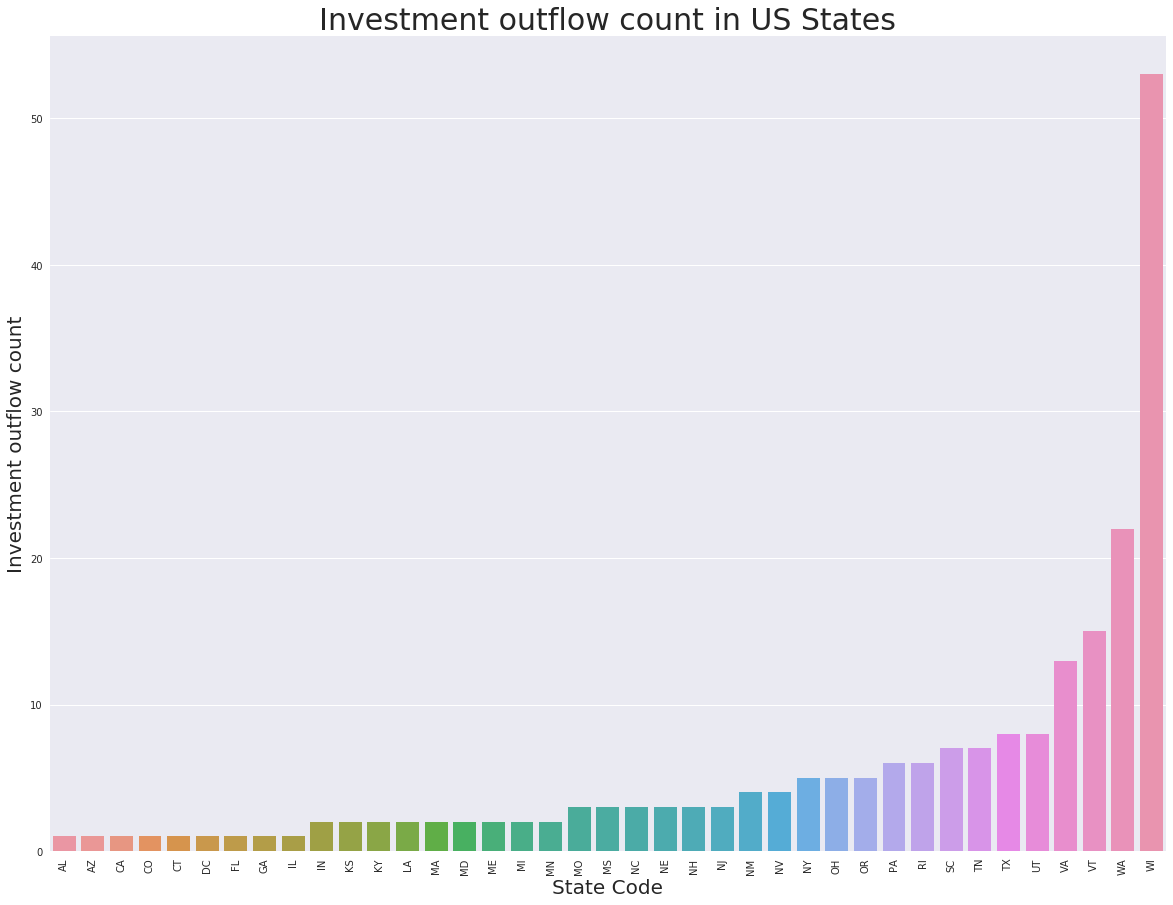

In [25]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=outgoing_investments_mean_by_state.index, y=outgoing_investments_count_by_state, 
              data=outgoing_investments_mean_by_state)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.set_title("Investment outflow count in US States",fontsize=30)
ax.set_xlabel("State Code",fontsize=20)
ax.set_ylabel("Investment outflow count",fontsize=20)
print

In [26]:
outgoing_investments_by_msa = outgoing_investments_df.groupby('msa_name_investors')
outgoing_investments_mean_by_msa = outgoing_investments_by_msa.mean()
outgoing_investments_count_by_msa = outgoing_investments_by_msa.size().sort_values()

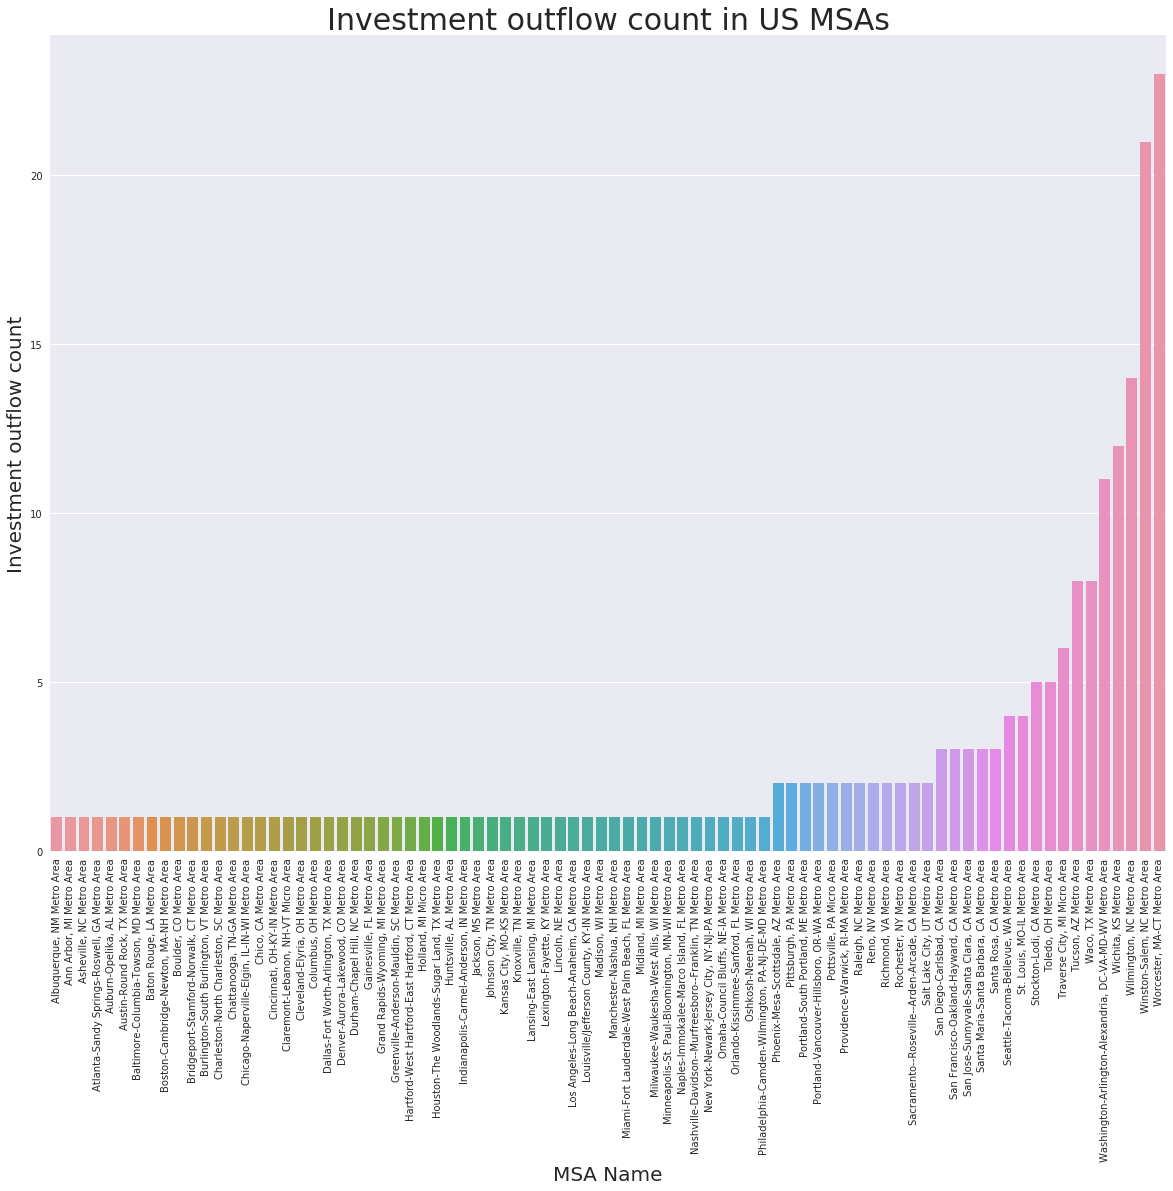

In [28]:
plt.subplots(figsize=(20,15))
ax = sns.barplot(x=outgoing_investments_mean_by_msa.index, y=outgoing_investments_count_by_msa, 
              data=outgoing_investments_mean_by_msa)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.axes.set_title("Investment outflow count in US MSAs",fontsize=30)
ax.set_xlabel("MSA Name",fontsize=20)
ax.set_ylabel("Investment outflow count",fontsize=20)
print

In [54]:
outgoing_investments_loc_df = outgoing_investments_df[ ['latitude_investors', 'longitude_investors'] ]
lon = outgoing_investments_loc_df['longitude_investors'].tolist()
lat = outgoing_investments_loc_df['latitude_investors'].tolist()

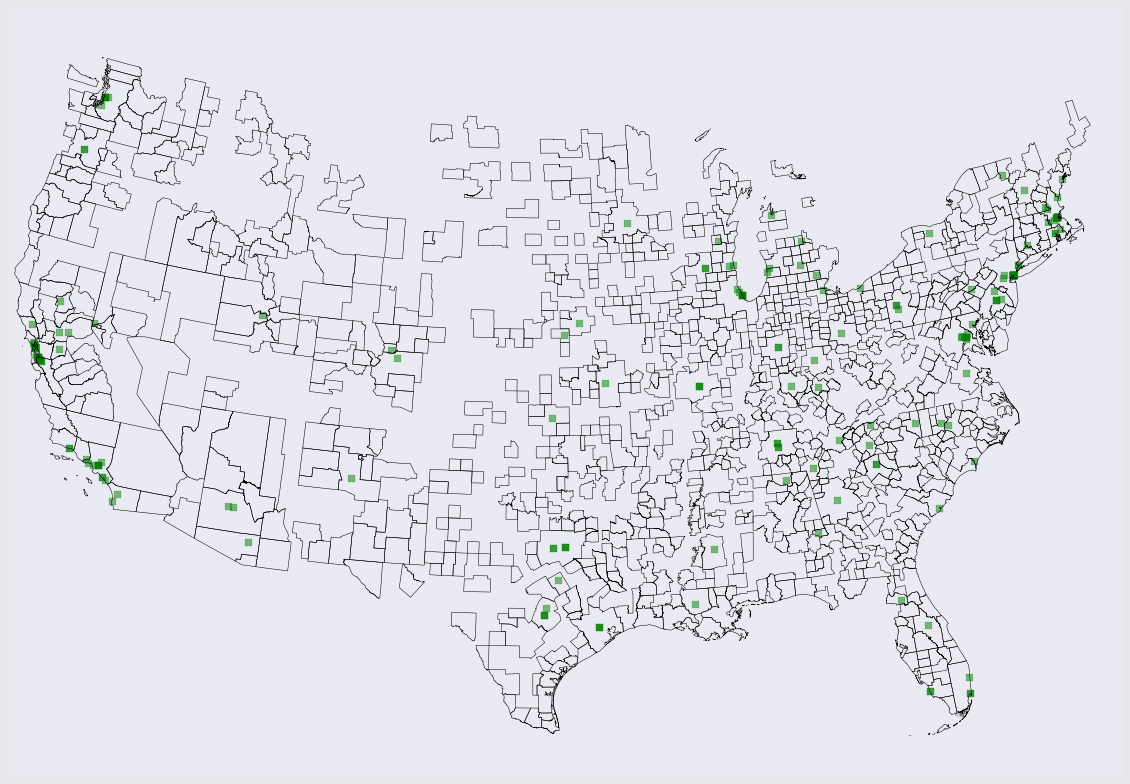

In [55]:
plt.ioff()
fig = plt.figure(figsize=(20,15))
m = Basemap(urcrnrlat=49.0,     # top
            urcrnrlon=-64.0,   # bottom
            llcrnrlat=22.0,     # left
            llcrnrlon=-119.0,   # right
            projection='lcc',
            lat_1=39,
            lon_0=-98
            )
fig.patch.set_facecolor('#e6e8ec')
m.readshapefile(path_to['shape_files'], 'msa', drawbounds=True)
x, y = m(lon, lat)
m.scatter(x, y, c='g', alpha=0.5, marker='s')
plt.show()